# Bengaluru Housing Price Prediction Model

#_Dataset: Bengaluru Realestate Pricing

#_Source: Kaggle

#_Reference: Codebasics

#_Contents of the notebook:
1. Data Exploration
  
  A. Finding Data Types
  
  B. Missing Value detection and treatment
  
  C. Redundancy Detection
  
  D. Descriptive Statistics 
  
  
2. Feature Engineering

  A. Dimentionality Reduction: Location (create others) 
  
  B. Add: price/sqft 
  
  C. Redundancies Check 
  
  D. Ouliers Treatment
  

3. Creating Dummies


4. Modeling

  A. Splitting
  
  B. Model Training
  
  C. Checking Accuracy 
  
  D. Predictions
  
  E. MAE Check

In [82]:
#Libraries required
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statistics
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,10)

## Loading Dataset

In [2]:
og_data = pd.read_csv('C:/Users/Kanchan/Desktop/Rheemaa/Python/Kaggle/Bengaluru_Housing_Price/Train.csv')
og_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
og_data.shape

(13320, 9)

## Exploring Data

1.Data Types
2.Missing Values
3.Redundancies
4.Descriptive Stats 


### 1. Finding Data Types

In [4]:
og_data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
og_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
og_data.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

### 2. Missing Values

In [7]:
og_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#Checking %
((og_data.isnull().sum())/len(og_data))*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

#### Imputing mode for NA in Balcony

In [9]:
#Checking unique values in balcony
og_data.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [10]:
#replacing missing values of balcony with mode
mode_bal = statistics.mode(og_data['balcony'])

og_data['balcony'].fillna(mode_bal, inplace=True)

In [11]:
og_data['balcony'].isnull().sum()

0

#### Dropping NA rows and cols

In [12]:
#Dropping society
og_data = og_data.drop(['society'], axis = 1)

In [13]:
#Dropping na in Location, size, bath
og_data = og_data.dropna()

In [14]:
og_data.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [15]:
og_data.shape

(13246, 8)

### 3. Looking for Redundancies

In [16]:
og_data.nunique()

area_type          4
availability      80
location        1304
size              31
total_sqft      2067
bath              19
balcony            4
price           1955
dtype: int64

#### Checking col: size

In [17]:
og_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
#Changing 1 RK to 0 Bedrooms
to_replace = {'1 RK':'0 Bedrooms'}
og_data = og_data.replace(to_replace)
og_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '0 Bedrooms', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
#Different names for same values
#Creating new col with BHK nos. only
og_data['BHK'] = og_data['size'].apply(lambda x: float(x.split(' ')[0]))
og_data

,area_type,availability,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4.0


#### Checking col: total_sqft

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
#showing rows tht are not float in total-sqft
x = og_data[~og_data['total_sqft'].apply(is_float)]
x['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [22]:
#Redudant values: sq.mt, perch, range, Sq.Yards, Acres, Guntha, Grounds, 
#Ignoring different unit values
#replace range values with average of the range
def convert_range(x):
    values = x.split('-')
    if len(values) == 2:
        avg = ((float(values[0])+float(values[1]))/2)
        return avg
    try:
        return float(x)
    except:
        return x

In [23]:
og_data['total_sqft1'] = og_data['total_sqft'].apply(convert_range)

#checking if range is there
'2100 - 2850' in og_data['total_sqft']

False

In [24]:
#Remaining redundant rows in total-sqft
y = og_data[~og_data['total_sqft1'].apply(is_float)]

#% check
(len(y)/len(og_data))*100

0.3472746489506266

In [25]:
y_indices = y.index

proc_data_1 = pd.DataFrame(og_data.drop(y_indices))
proc_data_1['total_sqft1'].dtypes

dtype('O')

In [26]:
#Converting total_sqft1 into float
proc_data_1['total_sqft1'] = pd.to_numeric(og_data.total_sqft1, errors = 'coerce')
proc_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13200 non-null  object 
 1   availability  13200 non-null  object 
 2   location      13200 non-null  object 
 3   size          13200 non-null  object 
 4   total_sqft    13200 non-null  object 
 5   bath          13200 non-null  float64
 6   balcony       13200 non-null  float64
 7   price         13200 non-null  float64
 8   BHK           13200 non-null  float64
 9   total_sqft1   13200 non-null  float64
dtypes: float64(5), object(5)
memory usage: 876.6+ KB


### 4. Descriptive Stats

In [27]:
proc_data_1.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'BHK', 'total_sqft1'],
      dtype='object')

In [28]:
proc_data_1.describe()

,bath,balcony,price,BHK,total_sqft1
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,2.691136,1.602348,112.276178,2.799848,1555.302783
std,1.338915,0.804268,149.175995,1.294595,1237.323445
min,1.000000,0.000000,8.000000,0.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000,1100.000000
50%,2.000000,2.000000,71.850000,3.000000,1275.000000
75%,3.000000,2.000000,120.000000,3.000000,1672.000000
max,40.000000,3.000000,3600.000000,43.000000,52272.000000


In [29]:
#Removing unwanted columns
proc_data_1 = proc_data_1.drop(columns=['size','total_sqft'],axis=1)

In [30]:
proc_data_1.columns

Index(['area_type', 'availability', 'location', 'bath', 'balcony', 'price',
       'BHK', 'total_sqft1'],
      dtype='object')

array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'BHK'}>],
       [<AxesSubplot:title={'center':'total_sqft1'}>, <AxesSubplot:>]],
      dtype=object)

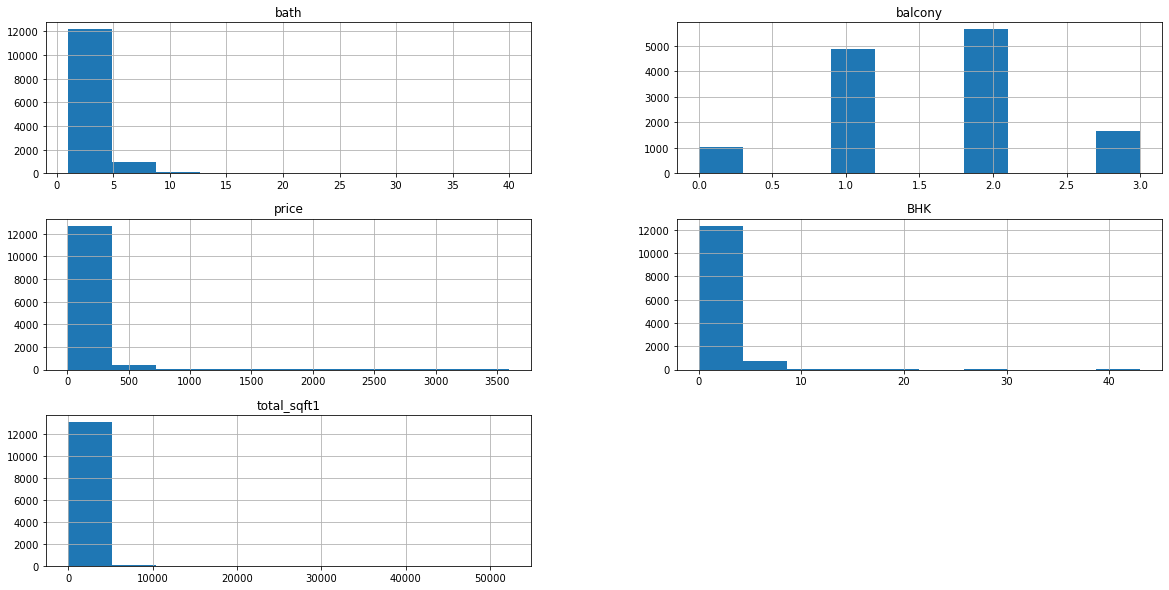

In [31]:
proc_data_1.hist()

### Feature Engineering

1.Dimentionality Reduction: Location (create others)
2.Add: price/sqft
3.Redundancies Check
4.Ouliers Treatment

#### 1. Dimentionality Reduction
##### Location

In [32]:
#Removing any spaces in the location feature
proc_data_1['location'] = proc_data_1.location.apply(lambda x: x.strip())

#Location frequency dist table
location_dist = proc_data_1.groupby(proc_data_1['location'])['location'].count()

#Filtering out those locations with less than 10 freq
location_lessthan10 = location_dist[location_dist<=10]
location_lessthan10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1047, dtype: int64

In [33]:
#Putiing all the locations with <=10 record into 'others' category
proc_data_1['location'] = proc_data_1.location.apply(lambda x: 'others' if x in location_lessthan10 else x)
proc_data_1.location.nunique()

241

#### 2. Adding pric/sqft feature
##### price/sqft

In [34]:
proc_data_1['price/sqft'] = ((proc_data_1['price']*100000)/proc_data_1['total_sqft1'])
proc_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13200 non-null  object 
 1   availability  13200 non-null  object 
 2   location      13200 non-null  object 
 3   bath          13200 non-null  float64
 4   balcony       13200 non-null  float64
 5   price         13200 non-null  float64
 6   BHK           13200 non-null  float64
 7   total_sqft1   13200 non-null  float64
 8   price/sqft    13200 non-null  float64
dtypes: float64(6), object(3)
memory usage: 876.6+ KB


#### 3. Redundancies Check

##### BHK

In [35]:
proc_data_2 = proc_data_1.copy()
#Sqft/bedroom = 300 (usually)
#Checking is every record has 300sqft rooms
out_bhk = proc_data_2[proc_data_2['total_sqft1']/proc_data_2['BHK']<300]
out_bhk

,area_type,availability,location,bath,balcony,price,BHK,total_sqft1,price/sqft
9,Plot Area,Ready To Move,others,6.0,2.0,370.0,6.0,1020.0,36274.509804
45,Plot Area,Ready To Move,HSR Layout,9.0,2.0,200.0,8.0,600.0,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,4.0,1.0,150.0,6.0,1407.0,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,7.0,0.0,85.0,8.0,1350.0,6296.296296
70,Plot Area,Ready To Move,others,3.0,2.0,100.0,3.0,500.0,20000.000000
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,others,7.0,2.0,218.0,7.0,1400.0,15571.428571
13279,Plot Area,Ready To Move,others,5.0,2.0,130.0,6.0,1200.0,10833.333333
13281,Plot Area,Ready To Move,Margondanahalli,5.0,1.0,125.0,5.0,1375.0,9090.909091
13303,Plot Area,Ready To Move,Vidyaranyapura,5.0,3.0,70.0,5.0,774.0,9043.927649


In [36]:
#Desirable: total_sqft1/bhk = 300
#Therefore, bhk = total_sqt1/300
#Replacing out_bhk values with bhk
out_bhk['BHK'] = round(out_bhk['total_sqft1']/300)
out_bhk['BHK'].unique()

<ipython-input-36-7319de2df34c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_bhk['BHK'] = round(out_bhk['total_sqft1']/300)


array([ 3.,  2.,  5.,  4.,  1.,  6.,  0.,  8., 27.,  7.,  9.])

In [37]:
#Replacing outliers with desired values
proc_data_2.loc[out_bhk.index] = out_bhk
proc_data_2['BHK'].unique()

array([ 2.,  4.,  3.,  1.,  0.,  5.,  8.,  6.,  7., 11.,  9., 27., 10.,
       16., 13.])

##### Bath

In [38]:
#In 2 BHK max baths possible = 3
out_bath = proc_data_2[proc_data_2['bath']>proc_data_2['BHK']+1]
out_bath

,area_type,availability,location,bath,balcony,price,BHK,total_sqft1,price/sqft
9,Plot Area,Ready To Move,others,6.0,2.0,370.0,3.0,1020.0,36274.509804
45,Plot Area,Ready To Move,HSR Layout,9.0,2.0,200.0,2.0,600.0,33333.333333
68,Plot Area,Ready To Move,Devarachikkanahalli,7.0,0.0,85.0,4.0,1350.0,6296.296296
84,Super built-up Area,Ready To Move,EPIP Zone,5.0,2.0,102.0,3.0,1499.0,6804.536358
89,Plot Area,Ready To Move,Rajaji Nagar,6.0,3.0,160.0,2.0,710.0,22535.211268
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,Ready To Move,Laggere,9.0,3.0,132.0,5.0,1590.0,8301.886792
13221,Plot Area,Ready To Move,others,9.0,1.0,75.0,4.0,1178.0,6366.723260
13277,Plot Area,Ready To Move,others,7.0,2.0,218.0,5.0,1400.0,15571.428571
13303,Plot Area,Ready To Move,Vidyaranyapura,5.0,3.0,70.0,3.0,774.0,9043.927649


In [39]:
#replacing out_bath values with desired value
desired_val = (out_bath['BHK']+1)
out_bath['bath']=desired_val
out_bath['bath'].unique()

<ipython-input-39-ea85414d20a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_bath['bath']=desired_val


array([ 4.,  3.,  5.,  2.,  1.,  6.,  7., 10.,  8., 11.,  9.])

In [40]:
#Replacing outliers with desired values
proc_data_2.loc[out_bath.index] = out_bath
proc_data_2['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 10., 27., 11., 16.,
       12., 13.])

#### 4. Outlier Treatment

<AxesSubplot:>

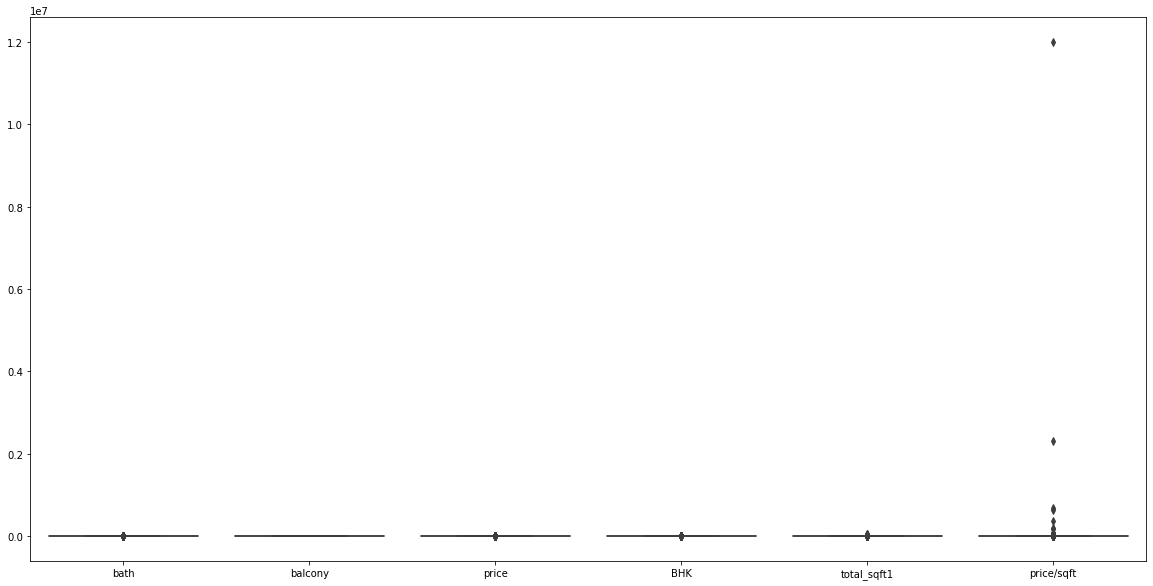

In [41]:
sns.boxplot(data=proc_data_2)

##### price/sqft

In [42]:
#Removing outliers usinf std. dev
#Defining function to remove outliers
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price/sqft'])
        st = np.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
proc_data_3 = remove_pps_outliers(proc_data_2)
proc_data_3.shape

(11434, 9)

<AxesSubplot:>

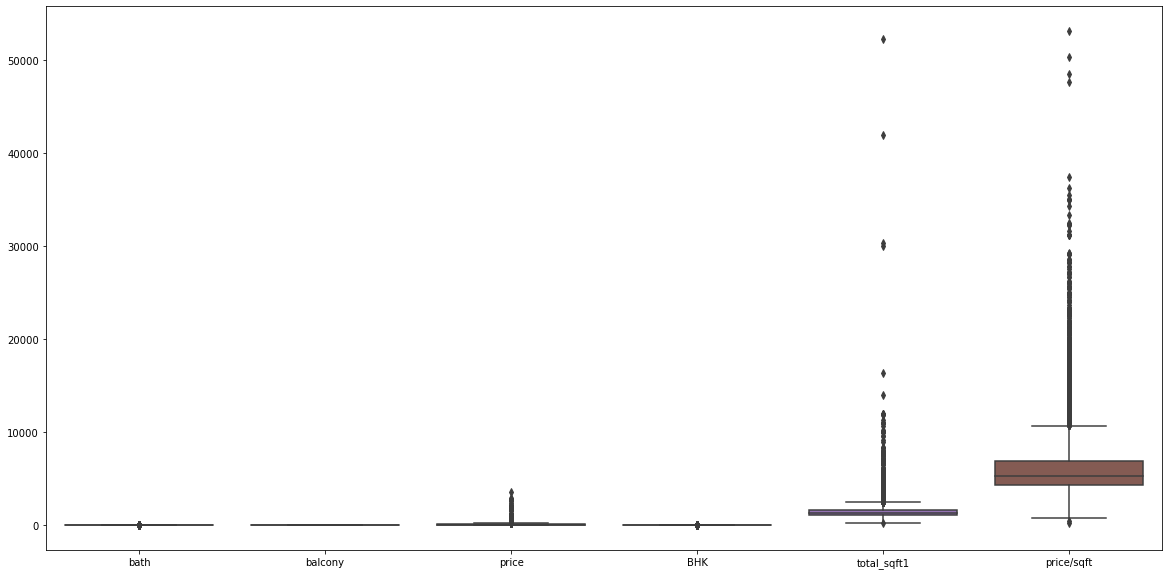

In [43]:
sns.boxplot(data=proc_data_3)

In [44]:
#Outlier threshold > 10,000 & <1500
outliers = proc_data_3[proc_data_3['price/sqft']>10000]

In [45]:
#Replacing with mean
mean_pps = statistics.mean(proc_data_3['price/sqft'])
proc_data_3['price/sqft'].loc[outliers.index] = mean_pps

C:\Users\Kanchan\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

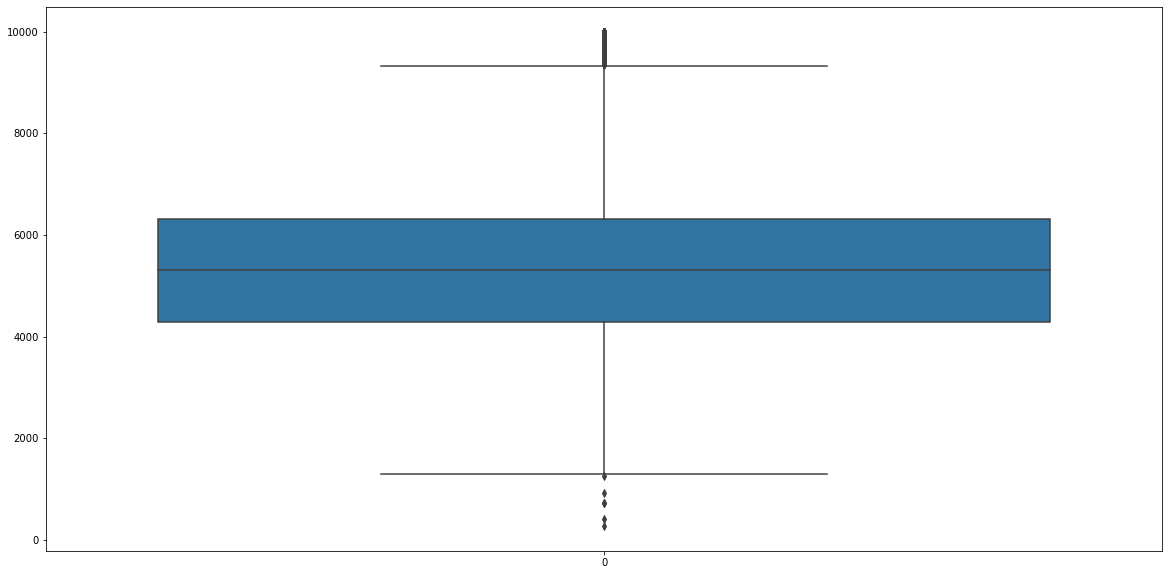

In [46]:
sns.boxplot(data=proc_data_3['price/sqft'])

##### Bath and BHK

<AxesSubplot:>

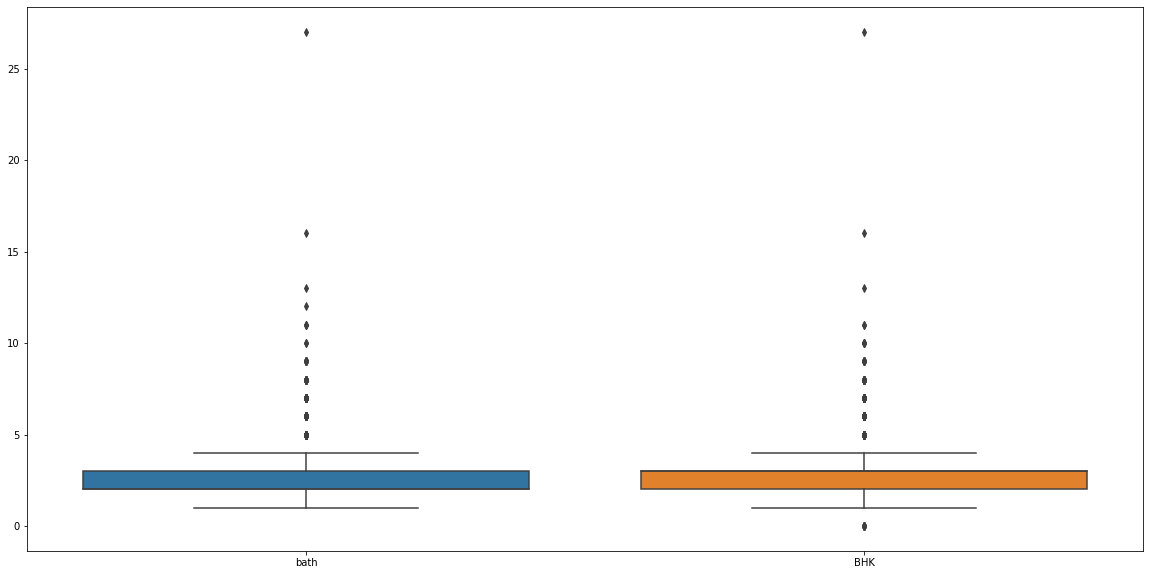

In [47]:
sns.boxplot(data=proc_data_3[['bath','BHK']])

In [48]:
proc_data_4 = proc_data_3.copy()
#bath and bhk threshold = 4
#Droping outliers from bath,bhk and remaining from price/sqft
out_pps = proc_data_3[(proc_data_3['price/sqft']>9500) | (proc_data_3['price/sqft']<1500)]
proc_data_4 = proc_data_4.drop(out_pps.index)

out_bath = proc_data_4[proc_data_3['bath']>4]
proc_data_4 = proc_data_4.drop(out_bath.index)

out_bhk = proc_data_4[proc_data_3['BHK']>4]
proc_data_4 = proc_data_4.drop(out_bhk.index)

proc_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10597 entries, 0 to 11431
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10597 non-null  object 
 1   availability  10597 non-null  object 
 2   location      10597 non-null  object 
 3   bath          10597 non-null  float64
 4   balcony       10597 non-null  float64
 5   price         10597 non-null  float64
 6   BHK           10597 non-null  float64
 7   total_sqft1   10597 non-null  float64
 8   price/sqft    10597 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.7+ KB


<ipython-input-48-2bb6c7d1b2a6>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_bath = proc_data_4[proc_data_3['bath']>4]
<ipython-input-48-2bb6c7d1b2a6>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  out_bhk = proc_data_4[proc_data_3['BHK']>4]


array([[<AxesSubplot:title={'center':'bath'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'BHK'}>],
       [<AxesSubplot:title={'center':'total_sqft1'}>,
        <AxesSubplot:title={'center':'price/sqft'}>]], dtype=object)

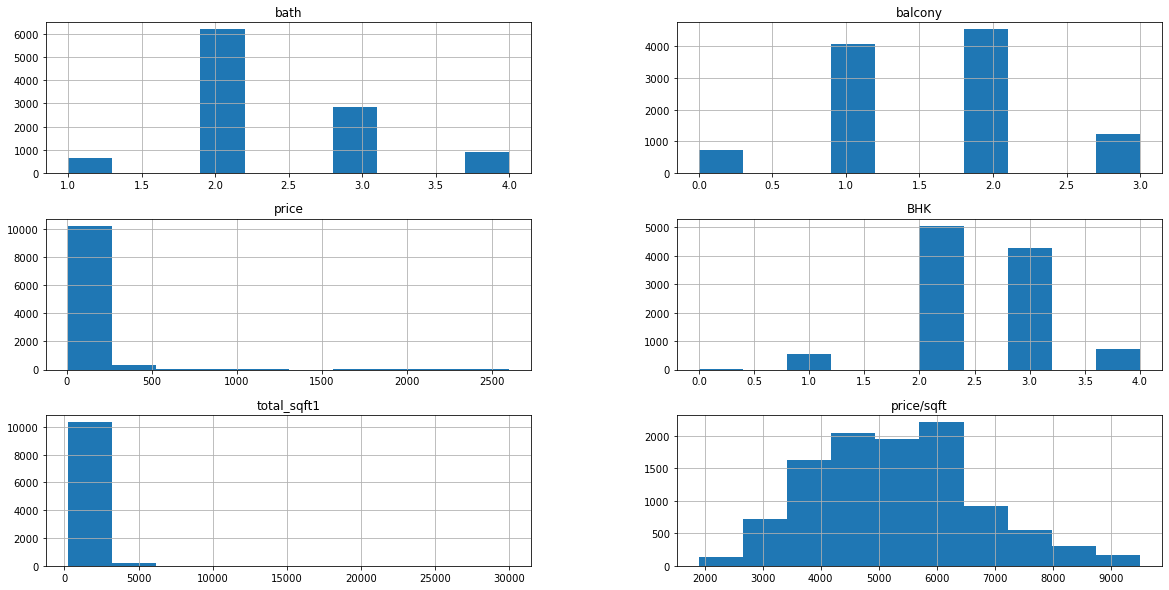

In [49]:
proc_data_5 = proc_data_4[['area_type','location','bath','balcony','price','BHK','total_sqft1','price/sqft']]
proc_data_5.hist()

In [50]:
proc_data_5.columns

Index(['area_type', 'location', 'bath', 'balcony', 'price', 'BHK',
       'total_sqft1', 'price/sqft'],
      dtype='object')

In [51]:
#Final set to be use 
proc_data = proc_data_5[['area_type','location','bath','balcony','price','BHK','total_sqft1']]
proc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10597 entries, 0 to 11431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area_type    10597 non-null  object 
 1   location     10597 non-null  object 
 2   bath         10597 non-null  float64
 3   balcony      10597 non-null  float64
 4   price        10597 non-null  float64
 5   BHK          10597 non-null  float64
 6   total_sqft1  10597 non-null  float64
dtypes: float64(5), object(2)
memory usage: 579.5+ KB


### Checking Correlations

<AxesSubplot:>

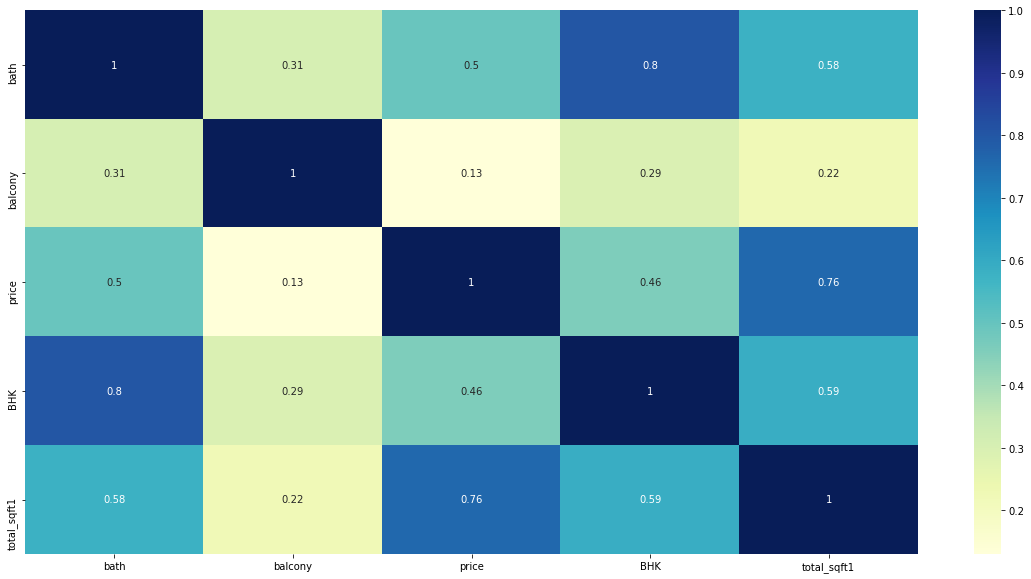

In [52]:
data = proc_data.drop(['area_type','location'],axis=1)
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True, annot_kws={"size": 10})

### Creating Dummies

#### 1.Location

In [53]:
dummies_loc = pd.get_dummies(proc_data['location'])
dummies_loc

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
num_data_1 = pd.concat([proc_data,dummies_loc],axis='columns')
num_data_1

,area_type,location,bath,balcony,price,BHK,total_sqft1,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,Super built-up Area,1st Block Jayanagar,4.0,1.0,428.00,4.0,2850.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,3.0,2.0,194.00,3.0,1630.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Block Jayanagar,2.0,3.0,235.00,3.0,1875.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Plot Area,1st Block Jayanagar,4.0,2.0,85.00,3.0,930.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Plot Area,1st Block Jayanagar,3.0,2.0,104.00,2.0,700.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,Built-up Area,others,2.0,1.0,65.00,2.0,1256.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11428,Super built-up Area,others,2.0,2.0,110.00,2.0,1353.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11429,Plot Area,others,1.0,0.0,26.00,1.0,812.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11430,Super built-up Area,others,2.0,2.0,63.93,3.0,1440.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Area_type

In [55]:
dummies_at = pd.get_dummies(proc_data['area_type'])
dummies_at

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
3,0,0,0,1
4,0,0,1,0
5,0,0,1,0
...,...,...,...,...
11426,1,0,0,0
11428,0,0,0,1
11429,0,0,1,0
11430,0,0,0,1


In [56]:
num_data_2 = pd.concat([num_data_1,dummies_at],axis='columns')
num_data_2

,area_type,location,bath,balcony,price,BHK,total_sqft1,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,4.0,1.0,428.00,4.0,2850.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,3.0,2.0,194.00,3.0,1630.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Super built-up Area,1st Block Jayanagar,2.0,3.0,235.00,3.0,1875.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Plot Area,1st Block Jayanagar,4.0,2.0,85.00,3.0,930.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Plot Area,1st Block Jayanagar,3.0,2.0,104.00,2.0,700.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,Built-up Area,others,2.0,1.0,65.00,2.0,1256.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
11428,Super built-up Area,others,2.0,2.0,110.00,2.0,1353.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11429,Plot Area,others,1.0,0.0,26.00,1.0,812.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11430,Super built-up Area,others,2.0,2.0,63.93,3.0,1440.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [57]:
#Removing unwanted columns
num_data = num_data_2.drop(['others','location','area_type'],axis=1)
num_data = num_data.astype(int)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10597 entries, 0 to 11431
Columns: 249 entries, bath to Super built-up  Area
dtypes: int32(249)
memory usage: 10.1 MB


### Modeling

#### Defining X and Y variables for Model

In [58]:
#Target Variable = Price
X = num_data.drop(['price'],axis=1)
Y = num_data['price']

#### Splitting Data

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=40)

#### Modeling
#### (Random Forest)

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6757097296968271

In [63]:
lr.score(X_train,y_train)

0.6923190491216302

#### Predictions

In [65]:
pred = lr.predict(X_test)

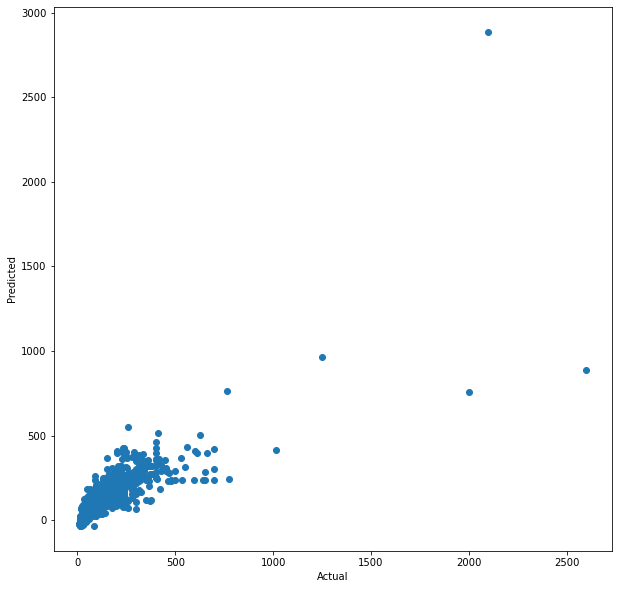

In [83]:
plt.scatter(y_test,pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,pred)
mae

25.5530561577671

In [70]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

59.97252060901653